<a href="https://colab.research.google.com/github/UniverseTalker/datascience/blob/inventoAI/inventocnn_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#inventory items classification  using convolutional neural network



#inventoAI
# inventory items classification
We have image dataset taken from inventory items as example

The dataset is small just as a demo how a neural network can be used in classification


2- read the sample and convert it into stored Pandas data frame .

3-use it for training and Testing our Convolution Neural Network Model .

4- check the accuracy of the model and optimizing it .

5-Store the model in H5 file type

6-load the model and Use it for new images classifications.


[1]importing important Libraries

In [7]:
#importing the libraries
import os
import cv2
import numpy as np
import tensorflow.python.keras
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from keras import models, layers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
import pandas as pd

[2]defining a function to read the image files from same category (in one folder )..resize each  into 128,128 and define the label for this category .
create pandas dataframe and return it  

In [8]:
def images_to_ds (path,class_id):
   img_data_func = []
   for img in os.listdir(path):
      pic = cv2.imread(os.path.join(path,img))
      pic = cv2.cvtColor(pic ,cv2.COLOR_BGR2RGB)
      pic = cv2.resize(pic,(128,128))
      img_data_func.append([pic])
   iDS= pd.DataFrame(img_data_func)
   iDS["Target"]= class_id
   return iDS

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[3]calling the function to read the sample folders of the four categories
and concatinating all the dataframes .

In [10]:
iDS_arch =images_to_ds("/content/drive/MyDrive/images1/HELMET",0)
iDS_cult =images_to_ds("/content/drive/MyDrive/images1/SCREW",1)
iDS_food =images_to_ds("/content/drive/MyDrive/images1/SILICON",2)
iDS_travel =images_to_ds("/content/drive/MyDrive/images1/FILES",3)
iDS= pd.concat([iDS_arch, iDS_cult,iDS_food,iDS_travel], axis=0)


[4] shuffling the records randomly in place by calling .sample ()where fraction is the whole dataframe frac=1.

defining categories array

classids=["HELMET","SCREWS","SILICON","FILES"]

dividing the dataframe into x and y .

dividing data into training and testing data



In [14]:
iDS = iDS.sample(frac=1).reset_index(drop=True)
iDS.shape
classids=["HELMET","SCREWS","SILICON","FILES"]
xfeature=iDS.iloc[:,0].values
y_label=iDS.iloc[:,1].values
xfeature.shape
X_train,X_test,y_train,y_test=train_test_split(xfeature,y_label,test_size=0.2,random_state=0)
X_test.shape

(16,)

[5] Reshaping our data into the needed shape

 where is 64 is the number of training images  
20 is the testing images

and normalizing RGB values by dividing by 255 so all values become between 0 and 1 to minimize calculations .

In [15]:
xtr=np.array(X_train.tolist()).reshape(64,128,128,3)/255.0
xts=np.array(X_test.tolist()).reshape(16,128,128,3)/255.0
ytr=y_train.reshape(-1,)
yts=y_test.reshape(-1,)

[6] Defining a function for plotting different pictures with related category

In [16]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classids[y[index]])

[7]examples from the traing images

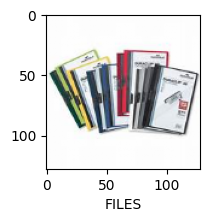

In [17]:
plot_sample(xtr, ytr, 7)

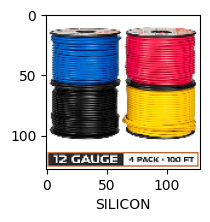

In [20]:
plot_sample(xtr, ytr, 60)

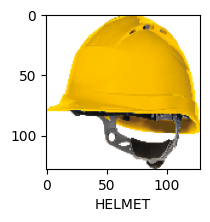

In [21]:
plot_sample(xtr, ytr, 34)

[10]defining the layers and filters sizes of our cnn model , using pooling .
using relu activation function inside the hidden layers and

softmax in the output layer since its the best in multi classes cases .

input_shape=(128, 128, 3) is because each image has RGB 3 layers

In [22]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')])


[11] compiling the model trying to optimize it with hyper parameters as seen
optimizer='adam'

loss='sparse_categorical_crossentropy'

metrics=['accuracy']

In [23]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

[12]fitting model on training data using 10 double sided rounds (epochs)

we can see the accuracy increasing in each epoch

In [24]:
cnn.fit(xtr, ytr, epochs=10)

Epoch 1/10
2/2 [==============================] - 3s 1s/step - loss: 4.1799 - accuracy: 0.2500
Epoch 2/10
2/2 [==============================] - 2s 1s/step - loss: 3.0462 - accuracy: 0.3438
Epoch 3/10
2/2 [==============================] - 2s 618ms/step - loss: 1.7680 - accuracy: 0.3125
Epoch 4/10
2/2 [==============================] - 1s 637ms/step - loss: 1.4524 - accuracy: 0.2344
Epoch 5/10
2/2 [==============================] - 1s 626ms/step - loss: 1.2459 - accuracy: 0.3750
Epoch 6/10
2/2 [==============================] - 1s 643ms/step - loss: 1.0147 - accuracy: 0.7031
Epoch 7/10
2/2 [==============================] - 1s 621ms/step - loss: 0.7450 - accuracy: 0.7969
Epoch 8/10
2/2 [==============================] - 1s 636ms/step - loss: 0.5122 - accuracy: 0.8906
Epoch 9/10
2/2 [==============================] - 1s 653ms/step - loss: 0.4001 - accuracy: 0.9062
Epoch 10/10
2/2 [==============================] - 2s 992ms/step - loss: 0.2806 - accuracy: 0.9219


[13]predictions done on test data

In [25]:
y_pred = cnn.predict(xts)
y_pred[:5]

1/1 [==============================] - 0s 179ms/step


array([[1.84147120e-01, 1.35387510e-01, 6.51811481e-01, 2.83828974e-02,
        1.99785150e-04, 1.48759891e-05, 6.41232191e-06, 2.20555739e-05,
        3.36217704e-06, 2.44045877e-05],
       [7.90302396e-01, 1.02070635e-02, 1.26168311e-01, 7.31176883e-02,
        1.75923124e-04, 2.35532639e-06, 1.94484346e-06, 1.44232936e-05,
        7.69630105e-07, 9.00511168e-06],
       [5.59307113e-02, 1.77186297e-03, 6.34720683e-01, 3.07575822e-01,
        8.80493076e-07, 1.45440215e-10, 2.61549060e-10, 5.29048849e-09,
        8.32005020e-11, 1.87145166e-09],
       [3.90336476e-02, 2.76301027e-04, 4.95724790e-02, 9.11112905e-01,
        4.49958407e-06, 2.33261854e-09, 3.16257665e-09, 1.56973798e-07,
        5.41037837e-09, 2.78181940e-08],
       [1.13561884e-01, 7.93253720e-01, 1.99780501e-02, 7.27375671e-02,
        3.89215304e-04, 2.11045353e-05, 9.56738404e-06, 2.77711133e-05,
        5.35371919e-06, 1.58068069e-05]], dtype=float32)

[14] getting the classes depending on the model prediction using argmax function
comparing the predicted classes and the original classes

In [26]:
y_classes = [np.argmax(element) for element in y_pred]

y_pred_class=np.array(y_classes)
y_pred_class[:15]

array([2, 0, 2, 3, 1, 3, 0, 3, 2, 3, 0, 0, 0, 2, 3])

In [27]:
yts[:15]

array([0, 0, 3, 3, 1, 3, 1, 3, 2, 3, 2, 1, 0, 2, 2])

[16] plotting some examples from testing images to see how accurate is the model

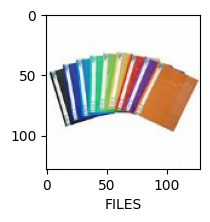

In [30]:
plot_sample(xts, yts, 5)

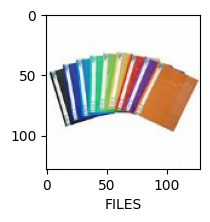

In [31]:
plot_sample(xts, y_pred_class,5)

In [33]:
classids[y_pred_class[5]]

'FILES'

[19] the cnn model  summary

In [34]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 63, 63, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 30, 30, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 57600)             0         
                                                                 
 dense (Dense)               (None, 64)                3

[20] evaluating the model accuracy on test data

In [35]:
cnn.evaluate(xts,yts)

1/1 [==============================] - 0s 266ms/step - loss: 0.8972 - accuracy: 0.6250


[0.8972300887107849, 0.625]

[21] saving the model to reuse for classifications in the other python file -to be continued

In [36]:
cnn.save("/content/drive/MyDrive/images1/cnn_INVENTORY.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
